In [105]:
from data_retriever import DataRetriever
from pre_processing import PreProcessing
from scalers.min_max import MinMax
from regressors.lstm_regressor import LSTMRegressor
from regressors.esn_regressor import ESNRegressor
from decomposers.wavelet_transform import WaveletDecomposition
from decomposers.hilbert_huang     import EMDDecomposition
from chm.chm import CascadeHierarquicalModel
import config
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from regressors.ann_regressor import ANNRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt
import os
import warnings
from IPython.display import display, Markdown
warnings.filterwarnings("ignore")

In [38]:
#Retrieving data from yahoo API
a = DataRetriever()
a.get_yahoo_stock_data()

#Obtaining yahoo dataset
dataset = a.get_stock_ds()

#Preprocessing yahoo data
pp = PreProcessing(dataset, MinMax)
ds = pp.pre_process_once()

#Setting up column to be used as features
x_cols = ds.columns.difference(['Date'])


[*********************100%***********************]  24 of 24 completed


# RMSE

# ABEV3.SA

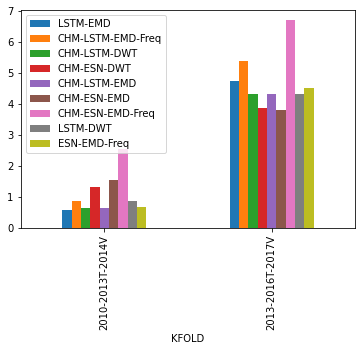

,LSTM-EMD,CHM-LSTM-EMD-Freq,CHM-LSTM-DWT,CHM-ESN-DWT,CHM-LSTM-EMD,CHM-ESN-EMD,CHM-ESN-EMD-Freq,LSTM-DWT,ESN-EMD-Freq
KFOLD,,,,,,,,,
2010-2013T-2014V,0.570102,0.857368,0.635468,1.317684,0.638719,1.538772,2.525669,0.871265,0.671345
2013-2016T-2017V,4.729476,5.377555,4.301499,3.866751,4.311610,3.800300,6.689180,4.315298,4.516228


In [107]:

kfolds_dict = config.Config.k_fold_variations
until = 9999999

for pred_ticker in ['ABEV3.SA']:#config.Config.ticker_stock_market_map['B3']: 
    
    display(Markdown('# '+ pred_ticker))
    #Setting up column to be predicted
    y_cols = pred_ticker  + '_Close'

    predicted_ds_acc = pd.DataFrame()

    for kfold in ['2010-2013T-2014V', '2013-2016T-2017V']:#kfolds_dict.keys():
            
        test = ds[ds.apply(lambda x: (x['Date'].year == kfolds_dict[kfold]['validation_year']), axis=1)]
        ground_truth = pp._scalers[y_cols].inverse_transform(test[7:][y_cols].values.reshape(-1,1))
        ground_truth = ground_truth.ravel()
        
        predicted_ds = pd.read_csv('./results_comp/' + kfold + '_' + pred_ticker +'.csv')

        predict_temp = pd.DataFrame(columns= list(predicted_ds.columns) + ['KFOLD'])
        predict_temp.loc[predict_temp.shape[0]] = [None for i in predict_temp.columns]
        predict_temp['KFOLD'] = kfold
        
        for col in predicted_ds.columns:
            predict_temp[col] = sqrt(mse(predicted_ds[col][:until], ground_truth[:until]))

        predicted_ds_acc = predicted_ds_acc.append(predict_temp)


    predicted_ds_acc.index = predicted_ds_acc['KFOLD']
    predicted_ds_acc = predicted_ds_acc.drop(['KFOLD'], axis=1)
    predicted_ds_acc.plot.bar()
    plt.show()
    display(predicted_ds_acc)
           

# MAPE

# ABEV3.SA

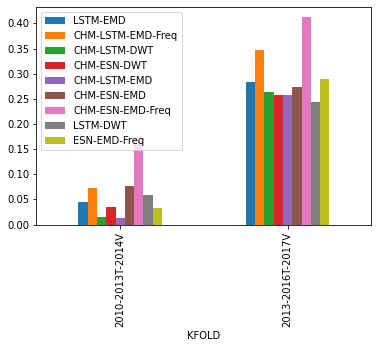

,LSTM-EMD,CHM-LSTM-EMD-Freq,CHM-LSTM-DWT,CHM-ESN-DWT,CHM-LSTM-EMD,CHM-ESN-EMD,CHM-ESN-EMD-Freq,LSTM-DWT,ESN-EMD-Freq
KFOLD,,,,,,,,,
2010-2013T-2014V,0.044162,0.072055,0.015576,0.035700,0.012111,0.07680,0.168634,0.058265,0.033287
2013-2016T-2017V,0.283511,0.346866,0.264277,0.256919,0.256803,0.27313,0.411801,0.244389,0.290337


In [103]:
for pred_ticker in ['ABEV3.SA']:#config.Config.ticker_stock_market_map['B3']: 
    
    display(Markdown('# '+ pred_ticker))
    #Setting up column to be predicted
    y_cols = pred_ticker  + '_Close'

    predicted_ds_acc = pd.DataFrame()

    for kfold in ['2010-2013T-2014V', '2013-2016T-2017V']:#kfolds_dict.keys():
            
        test = ds[ds.apply(lambda x: (x['Date'].year == kfolds_dict[kfold]['validation_year']), axis=1)]
        ground_truth = pp._scalers[y_cols].inverse_transform(test[7:][y_cols].values.reshape(-1,1))
        ground_truth = ground_truth.ravel()
        
        predicted_ds = pd.read_csv('./results_comp/' + kfold + '_' + pred_ticker +'.csv')

        predict_temp = pd.DataFrame(columns= list(predicted_ds.columns) + ['KFOLD'])
        predict_temp.loc[predict_temp.shape[0]] = [None for i in predict_temp.columns]
        predict_temp['KFOLD'] = kfold
        
        for col in predicted_ds.columns:
            predict_temp[col] = mape(predicted_ds[col][:until], ground_truth[:until])

        predicted_ds_acc = predicted_ds_acc.append(predict_temp)


    predicted_ds_acc.index = predicted_ds_acc['KFOLD']
    predicted_ds_acc = predicted_ds_acc.drop(['KFOLD'], axis=1)
    predicted_ds_acc.plot.bar()
    plt.show()
    display(predicted_ds_acc)

# MAE

# ABEV3.SA

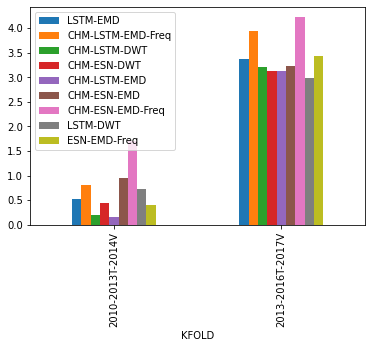

,LSTM-EMD,CHM-LSTM-EMD-Freq,CHM-LSTM-DWT,CHM-ESN-DWT,CHM-LSTM-EMD,CHM-ESN-EMD,CHM-ESN-EMD-Freq,LSTM-DWT,ESN-EMD-Freq
KFOLD,,,,,,,,,
2010-2013T-2014V,0.519853,0.804175,0.187026,0.440207,0.147987,0.951978,1.693932,0.731564,0.389166
2013-2016T-2017V,3.367052,3.939663,3.207301,3.126060,3.136357,3.233594,4.222457,2.978682,3.445608


In [106]:
for pred_ticker in ['ABEV3.SA']:#config.Config.ticker_stock_market_map['B3']: 
    
    display(Markdown('# '+ pred_ticker))
    #Setting up column to be predicted
    y_cols = pred_ticker  + '_Close'

    predicted_ds_acc = pd.DataFrame()

    for kfold in ['2010-2013T-2014V', '2013-2016T-2017V']:#kfolds_dict.keys():
            
        test = ds[ds.apply(lambda x: (x['Date'].year == kfolds_dict[kfold]['validation_year']), axis=1)]
        ground_truth = pp._scalers[y_cols].inverse_transform(test[7:][y_cols].values.reshape(-1,1))
        ground_truth = ground_truth.ravel()
        
        predicted_ds = pd.read_csv('./results_comp/' + kfold + '_' + pred_ticker +'.csv')

        predict_temp = pd.DataFrame(columns= list(predicted_ds.columns) + ['KFOLD'])
        predict_temp.loc[predict_temp.shape[0]] = [None for i in predict_temp.columns]
        predict_temp['KFOLD'] = kfold
        
        for col in predicted_ds.columns:
            predict_temp[col] = mae(predicted_ds[col][:until], ground_truth[:until])

        predicted_ds_acc = predicted_ds_acc.append(predict_temp)


    predicted_ds_acc.index = predicted_ds_acc['KFOLD']
    predicted_ds_acc = predicted_ds_acc.drop(['KFOLD'], axis=1)
    predicted_ds_acc.plot.bar()
    plt.show()
    display(predicted_ds_acc)